<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Water Management Notebook 1: Dealing with time series of data

In [1]:
# We will probably need these
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###Loading real data with Pandas
Real data is often stored in CSV files (Comma Separated Values).
So far, we have loaded csv files with the `np.loadtxt` command. 
The `loadtxt` function has some basic functionality and works just fine, but when we have more elaborate data sets we want more sophisticated functionality. 
The most powerful and advanced package for data handling and analysis is called `pandas`. We will use only a few functions of the `pandas` package here. Full information on `pandas` can be found on the <a href="http://pandas.pydata.org/">pandas website</a>.

Consider the following dataset, which is stored in the file `transport.csv`. It shows the percentage of transportation kilometers by car, bus or rail for four countries. The dataset has four columns. 

`country, car, bus, rail`  
`some more explanations, yada yada yada`  
`France, 86.1, 5.3, 8.6`  
`Germany, 85.2, 7.1, 7.7`  
`Netherlands, 86.4, 4.6, 9`  
`United Kingdom, 88.2, 6.5, 5.3` 

This data file is loaded with the `read_csv` function of the `pandas` package. The `read_csv` function has many options. We will only use three here. The rows that need to be skipped are defined with the `skiprows` keyword (in this case row 1 with the `yada yada` text). The `skipinitialspace` keyword is set to `True` so that the column name ' car' is loaded without the initial space that is in the data file. And the `index_col` keyword is set to indicate that the names in column 0 can be used as an index to select a row.

In [2]:
from pandas import read_csv
tran = read_csv('transport.csv', skiprows=[1], skipinitialspace=True, index_col=0)

Once you have loaded the data, you can print it to the screen

In [3]:
print(tran)

                 car  bus  rail
country                        
France          86.1  5.3   8.6
Germany         85.2  7.1   7.7
Netherlands     86.4  4.6   9.0
United Kingdom  88.2  6.5   5.3


When the DataFrame is large, you can still print it to the screen (`pandas` is smart enough not to show the entire DataFrame when it is very large), or you can simply print the first 5 lines of the DataFrame with the `.head()` function. 

###Basic DataFrame manipulation
The `read_csv` function returns what is called a DataFrame. The variable `tran` in the code above is now a DataFrame. The rows and columns of a DataFrame may have names, as you can see from printing the DataFrame to the screen. To find out which names are used for the columns, use the `keys` function, which is accessible with the dot syntax. You can loop through the names of the columns if you wish.

In [4]:
print('Names of columns:')
print(tran.keys())
for key in tran.keys():
    print(key)

Names of columns:
Index(['car', 'bus', 'rail'], dtype='str')
car
bus
rail


Each DataFrame may be indexed just like an array, by specifying the row and column number using the `.iloc` syntax (which stands for *index location*), where column 0 is the column labeled `car` (since the column labeled as `country` was stored as an index when reading the csv file; more on that later).

In [5]:
print(tran.iloc[0,1])  # Gives the bus data for France)
print(tran.iloc[1,0])  # Gives the car data for Germany)
print(tran.iloc[2,2])  # Gives the rail data for Netherlands)
print(tran.iloc[3])  # All data for United Kindom)
print(tran.iloc[:,1])  # All data for bus)

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


Alternatively, values in a DataFrame may be selected by specifying the indices by name, using the `.loc` syntax. This is a bit more typing but *much* more explicit. The equivalent of the code cell above, but using indices by name is

In [6]:
print(tran.loc['France','bus'])
print(tran.loc['Germany','car'])
print(tran.loc['Netherlands','rail'])
print(tran.loc['United Kingdom'])
print(tran.loc[:,'bus'])

5.3
85.2
9.0
car     88.2
bus      6.5
rail     5.3
Name: United Kingdom, dtype: float64
country
France            5.3
Germany           7.1
Netherlands       4.6
United Kingdom    6.5
Name: bus, dtype: float64


There are two alternative ways to access all the data in a column. First, you can simply specify the column name as an index, without having to use the `.loc` syntax. Second, the dot syntax may be used, like syntax `.column_name`, where `column_name` is the name of the column. Hence, the following three are equivalent

In [7]:
print(tran.loc[:,'car'])  # All rows of 'car' column)
print(tran['car'])  # 'car' column)
print(tran.car)

country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64
country
France            86.1
Germany           85.2
Netherlands       86.4
United Kingdom    88.2
Name: car, dtype: float64


###`numpy` functions for DataFrames
Series can be pretty much treated as arrays, especially when they contain data. Many `numpy` functions also work on DataFrames, but they can also be accessed with the *dot* syntax, like `dataframe_name.function()`. Simply type `tran.` in a code cell and then hit the [tab] key to see all the functions that are available. In the code cell below, we compute the maximum value of transportation by car, the country corresponding to the maximum value of transportation by car, and the mean value of all transportation by car. You can also find all values larger than a specified value, just like for arrays:

In [8]:
print('maximum car travel percentage:', tran.car.max())
print('country with maxum car travel percentage:', tran.car.argmax())
print('mean car travel percentage:', tran.car.mean())
print('all rail travel above 8 percent:')
print(tran.rail[ tran.rail > 8 ])

maximum car travel percentage: 88.2
country with maxum car travel percentage: 3
mean car travel percentage: 86.47500000000001
all rail travel above 8 percent:
country
France         8.6
Netherlands    9.0
Name: rail, dtype: float64


###Exercise 1. <a name="back1"></a>Average annual rainfall by country
The file `annual_precip.csv` contains the average yearly rainfall and total land area for all the countries in the world (well, there are some missing values);  the data is available on the website of the <a href="http://data.worldbank.org/">world bank</a>. Open the data file to see what it looks like (Notepad, Textedit, even Word if you have to). Load the data with the `read_csv` function of `pandas`, making sure that the names of the countries can be used to select a row, and perform the following tasks:

* Print the first 5 lines of the DataFrame to the screen with the `.head()` function.
* Print the average annual rainfall for Panama and make sure to include the units.
* Report the total land area of the Netherlands and make sure to include the units.
* Report all countries with an average annual rainfall less than 200 mm/year
* Report all countries with an average annual rainfall more than 2500 mm/year
* Report all countries with an average annual rainfall that is within 50 mm/year of the average annual rainfall in the Netherlands

In [9]:
from pandas import read_csv
rain = read_csv('annual_precip.csv',skiprows=2,index_col=0,)
#
print('First five lines of rain dataset:')
print(rain.head())
#
print(print('Average annual rainfall in Panama is',rain.loc['Panama','precip'],'mm/year'))
#
print(print('Land area of the Netherlands is', rain.loc['Netherlands','area'], 'thousand km^2/year'))
#
print(print('Countries where average rainfall is below 200 mm/year'))
print(rain[ rain.precip < 200 ])
#
print(print('Countries where average rainfall is above 2500 mm/year'))
print(rain[ rain.precip > 2500 ])
#
print(print('Countries with almost the same rainfall as the Netherlands'))

First five lines of rain dataset:
                precip    area
country                       
Afghanistan      327.0   652.2
Albania         1485.0    27.4
Algeria           89.0  2381.7
American Samoa     NaN     0.2
Andorra            NaN     0.5
Average annual rainfall in Panama is 2692.0 mm/year
None
Land area of the Netherlands is 33.7 thousand km^2/year
None
Countries where average rainfall is below 200 mm/year
None
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.0    83.6
Yemen, Rep.      

###Adding a column to a DataFrame
A column may be added to a DataFrame by simply specifying the name and values of the new column using the syntax `DataFrame['newcolumn']=something`. For example, let's add a column named `public_transport`, which is the sum of the `bus` and `rail` columns, and then find the country with the largest percentage of public transport

In [10]:
tran['public_transport'] = tran.bus + tran.rail
print('Country with largest percentage public transport:',tran.public_transport.argmax())

Country with largest percentage public transport: 1


###Plotting DataFrames
You can plot the column or row of a DataFrame with the `matplotlib` functions, as we have done in previous Notebooks, but `pandas` has also implemented its own, much more convenient, plotting functions (still based on `matplotlib` in the background, of course). The plotting capabilities of `pandas` also use the *dot* syntax, like `dataframe.plot()`. All columns can be plotted simultaneously (note that the names appear on the axes and the legend is added automatically!).

<Axes: xlabel='country'>

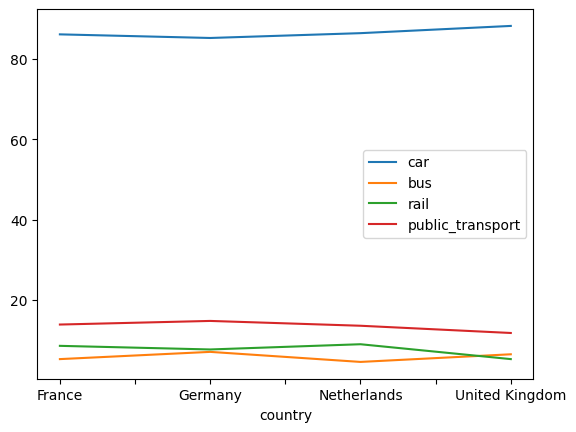

In [11]:
tran.plot()  # plot all columns

You can also plot one column at a time. The style of the plot may be specified with the `kind` keyword (the default is `'line'`). Check out `tran.plot?` for more options. 

<Axes: xlabel='country'>

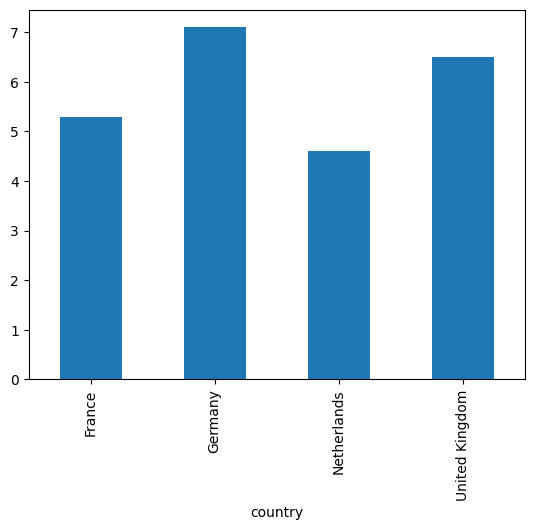

In [12]:
tran['bus'].plot(kind='bar')

###Sorting DataFrames
DataFrames may be sorted with the `.sort` function. The keyword `inplace=True` replaces the values in the DataFrame with the new sorted values (when `inplace=False` a new DataFrame is returned, which you can store in a separate variable so that you have two datasets, one sorted and one unsorted). The `sort` funcion has several keyword arguments, including `columns` which is either the name of one column to sort by or a list of columns so that data is sorted by the first specified column and when values are equal they are sorted by the next column in the list. Another keyword is `ascending`, which you can use to specify whether to sort in ascending order (`ascending=True`), or descending order (`ascending=False`)

In [13]:
print('Data sorted by car use:')
print(tran.sort_values(by='car'))
print('Data sorted by bus use:')
print(tran.sort_values(by='bus'))

Data sorted by car use:
                 car  bus  rail  public_transport
country                                          
Germany         85.2  7.1   7.7              14.8
France          86.1  5.3   8.6              13.9
Netherlands     86.4  4.6   9.0              13.6
United Kingdom  88.2  6.5   5.3              11.8
Data sorted by bus use:
                 car  bus  rail  public_transport
country                                          
Netherlands     86.4  4.6   9.0              13.6
France          86.1  5.3   8.6              13.9
United Kingdom  88.2  6.5   5.3              11.8
Germany         85.2  7.1   7.7              14.8


###Exercise 2. <a name="back2"></a>Average annual rainfall by country continued
Continue with the average yearly rainfall and total land area for all the countries in the world and perform the following tasks:

* Add a new column that stores the total average annual freshwater influx in km$^3$/year for each country. Make sure you convert your units correctly. 
* Sort the data on the total average annual freshwater influx in ascending order using the `.sort` syntax and report the 5 countries with the largest annual freshwater influx using the `iloc` syntax. (In older versions of IPython, the missing values may be sorted to the top of the DataFrame. To remove the missing values type: `dataframe_name.dropna()`)
* Make a bar graph of the 10 countries with the largest annual freshwater influx.

<a href="#ex2answer">Answers to Exercise 2</a>

###Time series data
In time series data, one of the columns represents dates, sometimes including times, together referred to as datetimes. `pandas` can be used to read csv files where one of the columns includes datetime data. You need to tell `pandas` which column contains datetime values and `pandas` will try to convert that column to datetime objects. Datetime objects are very convenient as specifics of the datetime object may be assessed with the dot syntax: `.year` returns the year, `.month` returns the month, etc.

For example, consider the following data stored in the file `timeseries1.dat`

`date, conc`  
`2014-04-01, 0.19`   
`2014-04-02, 0.23`   
`2014-04-03, 0.32`   
`2014-04-04, 0.29`   

The file may be read with `read_csv` using the keyword `parse_dates=[0]` so that column number 0 is converted to datetimes

In [14]:
data = read_csv('timeseries1.dat', parse_dates=[0])
print(data)

        date   conc
0 2014-04-01   0.19
1 2014-04-02   0.23
2 2014-04-03   0.32
3 2014-04-04   0.29
4 2014-04-05   0.32


The rows of the DataFrame `data` are numbered, as we have not told `pandas` what column to use as the index of the rows. The first column of the DataFrame `data` has datetime values. We can access, for example, the year, month, or day with the dot syntax

In [15]:
print('datetime of row 0:', data.iloc[0,0])
print('year  of row 0:', data.iloc[0,0].year)
print('month of row 0:', data.iloc[0,0].month)
print('day   of row 0:', data.iloc[0,0].day)

datetime of row 0: 2014-04-01 00:00:00
year  of row 0: 2014
month of row 0: 4
day   of row 0: 1


Time series data may also contain the time in addition to the date. For example, the data of the file `timeseries2.dat`, shown below, contains the day and time. You can access the `hour` or `minutes`, but also the time of a row of the DataFrame with the `.time()` function.

`date, conc`   
`2014-04-01 12:00:00, 0.19`   
`2014-04-01 13:00:00, 0.20`  
`2014-04-01 14:00:00, 0.23`  
`2014-04-01 15:00:00, 0.21` 

In [16]:
data = read_csv('timeseries2.dat', parse_dates=[0])
print(data)
print('hour  of row 0:', data.iloc[0,0].hour)
print('minute  of row 0:', data.iloc[0,0].minute)
print('time of row 0:', data.iloc[0,0].time())

                 date   conc
0 2014-04-01 12:00:00   0.19
1 2014-04-01 13:00:00   0.20
2 2014-04-01 14:00:00   0.23
3 2014-04-01 15:00:00   0.21
hour  of row 0: 12
minute  of row 0: 0
time of row 0: 12:00:00


###Exercise 3,  <a name="back3"></a>Load and plot daily rainfall
Rainfall data for the Netherlands may be obtained from the website of the Royal Dutch Meteorological Society <A href="http://www.knmi.nl/climatology/daily_data/selection.cgi">KNMI</A> . Daily rainfall for the weather station Rotterdam in 2012 is stored in the file `rotterdam_rainfall_2012.txt`. First open the file in a text editor to see what the file looks like. At the top of the file, an explanation is given of the data in the file. Read this. Load the data file with the `read_csv` function of `pandas`. Use the keyword `skiprows` to skip all rows except for the row with the names of the columns. Use the keyword `parse_dates` to give either the name or number of the column that should be converted to a datetime. Don't forget the `skipinitialspace` keyword, else the names of the columns may start with a bunch of spaces. Perform the following tasks:
* Some rainfall values in the dataset may be -1 (read the header of the file to learn why); set all rainfall values that are less than zero to zero. 
* Use the `plot` function of `pandas` to create a line plot of the daily rainfall with the number of the day (so not the date) along the vertical axis. 
* Use `matplotlib` functions to add labels to the axes and set the limits along the horizontal axis from 0 to 365. 
* Determine the maximum daily rainfall and the date of the maximum daily rainfall and print them to the screen.

Maximum daily rainfall 22.400000000000002
Date of maximum daily rainfall 2012-12-22 00:00:00


/tmp/ipykernel_14974/3925226197.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment.
Such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#chained-assignment
  rain.RH[rain.RH<0] = 0


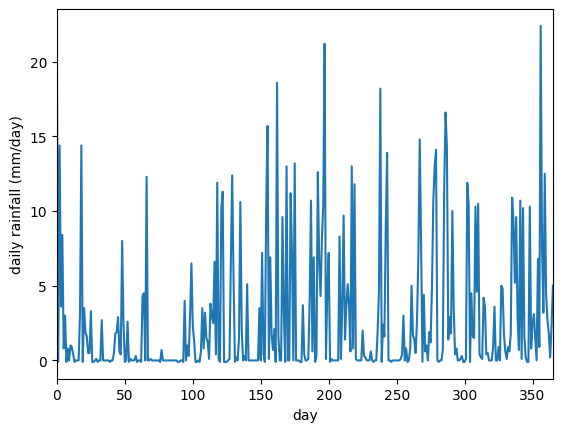

In [17]:
rain = read_csv('rotterdam_rainfall_2012.txt',skiprows=9,
                parse_dates=['YYYYMMDD'],skipinitialspace=True)
rain.RH = rain.RH * 0.1
rain.RH[rain.RH<0] = 0
rain.RH.plot()
plt.xlabel('day')
plt.ylabel('daily rainfall (mm/day)')
plt.xlim(0,365)
print('Maximum daily rainfall',rain.RH.max())
print('Date of maximum daily rainfall',rain.YYYYMMDD[rain.RH.argmax()])

<a href="#ex3answer">Answers to Exercise 3</a>

###Exercise 4,  <a name="back4"></a>Compute monthly rainfall from daily rainfall
In this exercise we are going to compute the total monthly rainfall for 2012 in the City of Rotterdam using the daily rainfall measurements we loaded in the previous Exercise; later on in this Notebook we learn convenient functions from `pandas` to do this, but here we are going to do this with a loop. Create an array of 12 zeros to store the monthly totals and loop through all the days in 2012 to compute the total rainfall for each month. The month associated with each row of the DataFrame may be obtained with the `.month` syntax, as shown above. Print the monthly totals (in mm/month) to the screen and create a bar graph of the total monthly rainfall (in mm/month) vs. the month using the `plt.bar` function of matplotlib. 

[ 82.3  23.9  21.5  57.1  76.1 118.5 121.4  93.2  51.7 132.2  63.3 149.3]


(0.0, 12.0)

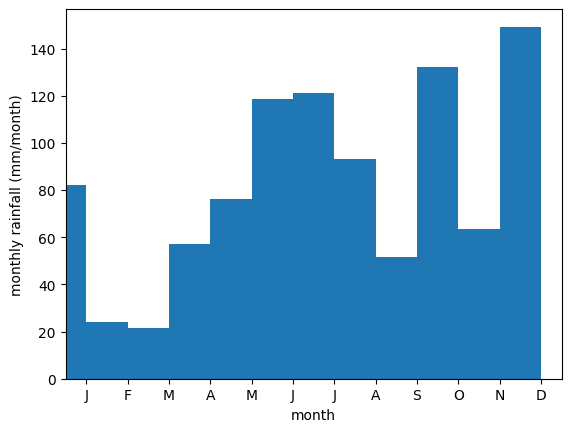

In [18]:
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month-1] += rain.iloc[i,2]
print(monthlyrain)
#
plt.bar(np.arange(12),monthlyrain,width=1)
plt.xlabel('month')
plt.ylabel('monthly rainfall (mm/month)')
plt.xticks(np.arange(12)+0.5,['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim(0,12)

<a href="#ex4answer">Answers to Exercise 4</a>

###Date times as index
The datetime of a dataset may also be used as the index of the DataFrame by specifying the column with the dates as the column to use for an index with the `index_col` keyword.  Note that datetimes are given as year-month-day, so `2012-04-01` means April 1, 2012.

In [19]:
data = read_csv('timeseries1.dat', parse_dates=[0], index_col=0)
print(data)
print('data on April 1:',data.loc['2014-04-01'])
print('data on April 2:',data.loc['2014-04-02'])

            conc
date            
2014-04-01  0.19
2014-04-02  0.23
2014-04-03  0.32
2014-04-04  0.29
2014-04-05  0.32
data on April 1: conc    0.19
Name: 2014-04-01 00:00:00, dtype: float64
data on April 2: conc    0.23
Name: 2014-04-02 00:00:00, dtype: float64


###Resampling
DataFrames have a very powerful feature called resampling. Downsampling refers to going from high frequency to low frequency. For example, going from daily data to monthly data. Upsampling refers to going from low frequency to high frequency. For example going from monthly data to daily data. For both upsampling and downsampling, you need to tell `pandas` how to perform the resampling. Here we discuss downsampling, as we did in Exercise 4, where we computed monthly totals from daily values. First we reload the daily rainfall in Rotterdam in 2012 and specify the dates as the index. We resample the rain to monthly totals using the `resample` function. You have to tell `resample` to resample to what frequency. Common ones are `'A'` for yearly, `'M'` for monthly, `'W'` for weekly, `'D'` for daily, and `'H'` for hourly, but there are many other ones (see  <A href="http://pandas.pydata.org/pandas-docs/version/0.12.0/timeseries.html">here</A>).  The keyword argument `how` is used to tell `pandas` how to compute the resampled data. This can be many things, like `'mean'` for the mean (that is the default), `'sum'` for the total, `'min'` and `'max'`, etc. The keyword argument `kind` is used to tell `pandas` where to assign the computed value to. You can assign the computed value to the last day of the period, or the first day, or to the entire period (in this case the entire month). The latter is done by specifying `kind='period'`, which is what we will do here. Calculating the montly totals and making a bar graph can now be done with `pandas` as follows. Compare these answers to your answer for Exercise 4 and make sure you got the right answer!

YYYYMMDD
2012-01-31     82.3
2012-02-29     23.9
2012-03-31     21.5
2012-04-30     57.1
2012-05-31     76.1
2012-06-30    118.5
2012-07-31    121.4
2012-08-31     93.2
2012-09-30     51.7
2012-10-31    132.2
2012-11-30     63.3
2012-12-31    149.3
Freq: ME, Name: RH, dtype: float64


/tmp/ipykernel_14974/1481181733.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment.
Such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#chained-assignment
  rain.RH[rain.RH<0] = 0


Text(0.5, 0, 'month')

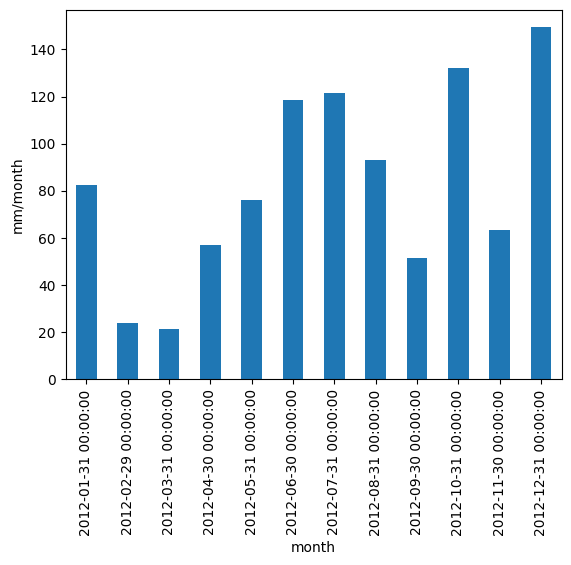

In [20]:
rain = read_csv('rotterdam_rainfall_2012.txt',skiprows=9,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
rain.RH[rain.RH<0] = 0
rain.RH = rain.RH * 0.1 # Convert to mm/day
monthlyrain = rain.RH.resample('ME').sum()
print(monthlyrain)
monthlyrain.plot(kind='bar')
plt.ylabel('mm/month')
plt.xlabel('month')

###Exercise 5,<a name="back5"></a> Resample weather data
The file `rotterdam_weather_2000_2010.txt` contains daily weather data at the weather station Rotterdam for the period 2000-2010 (again from the KNMI). Open the data file in an editor to see what is in it. Perform the following tasks:
* Load the data making sure the dates are used as index. 
* Convert the rain and evaporation to mm/day, and the temperature to degrees Celcius. 
* Set any negative rainfall (explained in the file) to zero. 
* Compute total yearly rainfall, total yearly evaporation, and mean yearly temperature. 
* Make a line plot of the yearly rainfall, yearly evaporation, and mean temperature using the `plot` function of `pandas`. Make sure to plot the mean temperature on the secondary $y$-axis (use the help function to find out how). 

/tmp/ipykernel_14974/1626128187.py:6: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment.
Such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#chained-assignment
  weather.RH[weather.RH<0] = 0


Text(0, 0.5, 'Rain/evap (mm/year)')

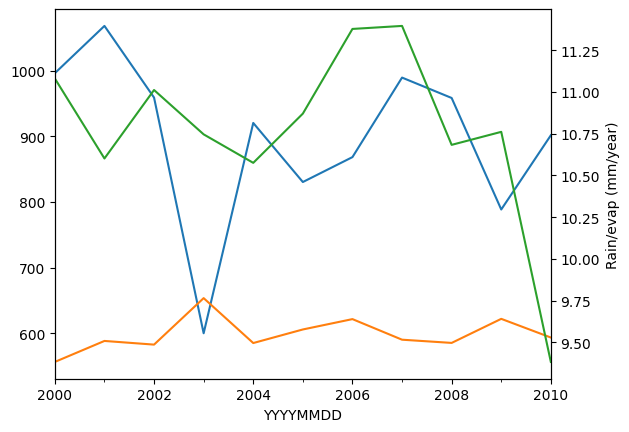

In [21]:
weather = read_csv('rotterdam_weather_2000_2010.txt',skiprows=11,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.RH[weather.RH<0] = 0
yearly_rain = weather.RH.resample('YE').sum()
yearly_evap = weather.EV24.resample('YE').sum()
yearly_temp = weather.TG.resample('YE').mean()
yearly_rain.plot()
yearly_evap.plot()
yearly_temp.plot(secondary_y=True)
plt.xlabel('Year')
plt.ylabel('Rain/evap (mm/year)')

<a href="#ex4answer">Answers to Exercise 4</a>

/tmp/ipykernel_14974/935300700.py:6: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment.
Such chained assignment never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

Try using '.loc[row_indexer, col_indexer] = value' instead, to perform the assignment in a single step.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#chained-assignment
  weather.RH[weather.RH<0] = 0


Text(0, 0.5, 'Rain min evap (mm/year)')

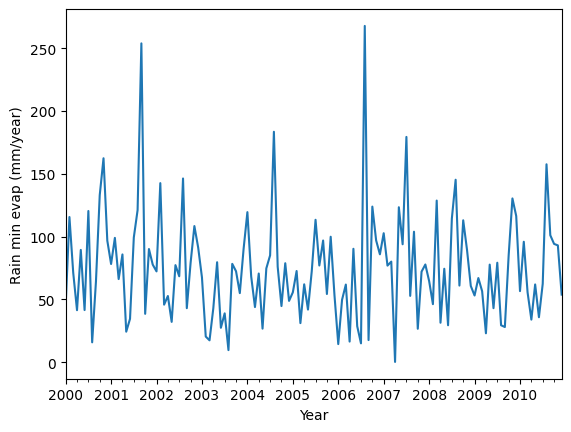

In [22]:
weather = read_csv('rotterdam_weather_2000_2010.txt',skiprows=11,
                parse_dates=['YYYYMMDD'],index_col='YYYYMMDD',skipinitialspace=True)
weather.TG = 0.1 * weather.TG
weather.RH = 0.1 * weather.RH
weather.EV24 = 0.1 * weather.EV24
weather.RH[weather.RH<0] = 0
weather['rain_min_evap'] = weather.RH - weather.EV24
yearly_rain_min_evap = weather.RH.resample('ME').sum()
yearly_rain_min_evap.plot()
plt.xlabel('Year')
plt.ylabel('Rain min evap (mm/year)')

###Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

In [23]:
from pandas import read_csv
rain = read_csv('annual_precip.csv',skiprows=2,index_col=0,)
#
print('First five lines of rain dataset:')
print(rain.head())
#
print(print('Average annual rainfall in Panama is',rain.loc['Panama','precip'],'mm/year'))
#
print(print('Land area of the Netherlands is', rain.loc['Netherlands','area'], 'thousand km^2/year'))
#
print(print('Countries where average rainfall is below 200 mm/year'))
print(rain[ rain.precip < 200 ])
#
print(print('Countries where average rainfall is above 2500 mm/year'))
print(rain[ rain.precip > 2500 ])
#
print(print('Countries with almost the same rainfall as the Netherlands'))
print(rain[ abs(rain.loc['Netherlands','precip'] - rain.precip) < 50 ])

First five lines of rain dataset:
                precip    area
country                       
Afghanistan      327.0   652.2
Albania         1485.0    27.4
Algeria           89.0  2381.7
American Samoa     NaN     0.2
Andorra            NaN     0.5
Average annual rainfall in Panama is 2692.0 mm/year
None
Land area of the Netherlands is 33.7 thousand km^2/year
None
Countries where average rainfall is below 200 mm/year
None
                      precip    area
country                             
Algeria                 89.0  2381.7
Bahrain                 83.0     0.8
Egypt, Arab Rep.        51.0   995.5
Jordan                 111.0    88.8
Kuwait                 121.0    17.8
Libya                   56.0  1759.5
Mauritania              92.0  1030.7
Niger                  151.0  1266.7
Oman                   125.0   309.5
Qatar                   74.0    11.6
Saudi Arabia            59.0  2149.7
Turkmenistan           161.0   469.9
United Arab Emirates    78.0    83.6
Yemen, Rep.      

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

Countries with almost the same rainfall as Netherlands
                 precip    area
country                        
Burkina Faso      748.0   273.6
Lesotho           788.0    30.4
Mexico            752.0  1944.0
Netherlands       778.0    33.7
Slovak Republic   824.0    48.1
Swaziland         788.0    17.2
Country with largest influx of rain
26 15074.6508 km^3 per year
                    precip     area      totalq
country                                        
Brazil              1782.0   8459.4  15074.6508
Russian Federation   460.0  16376.9   7533.3740
United States        715.0   9147.4   6540.3910
China                645.0   9327.5   6016.2375
Indonesia           2702.0   1811.6   4894.9432


<Axes: xlabel='country'>

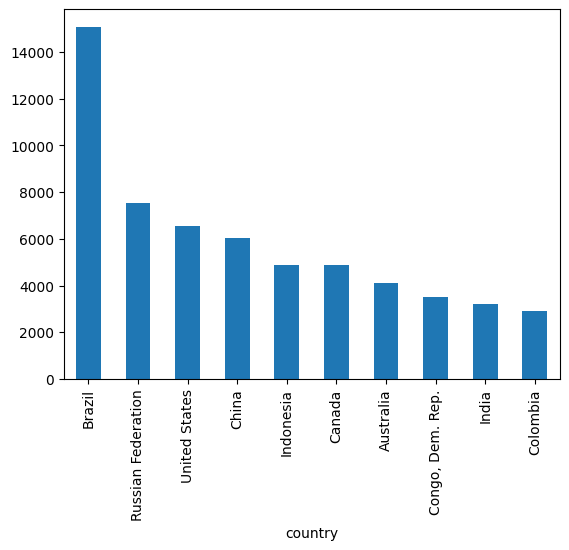

In [24]:
print('Countries with almost the same rainfall as Netherlands')
print(rain[ abs(rain.loc['Netherlands','precip'] - rain.precip) < 50 ])
#
rain['totalq'] = rain.precip * rain.area * 1e-3
print('Country with largest influx of rain')
print(rain.totalq.argmax(), rain.totalq.max(), 'km^3 per year')
#
# print(#rain = rain.dropna()  # Drop the NaN values)
rain.sort_values(by='totalq',ascending=False,inplace=True)
print(rain[:5])
#
rain.totalq[:10].plot(kind='bar')

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

[ 949.  275.  288.  588.  590. 1132. 1389. 1026.  549. 1879.  673. 1546.]


(0.0, 12.0)

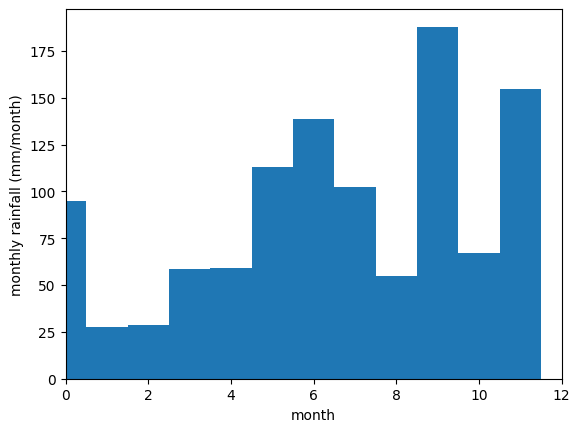

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv
rain = read_csv('rainfall_delft_2012.dat',skiprows=23,parse_dates=['YYYYMMDD'])
#
monthlyrain = np.zeros(12)
for i in range(len(rain)):
    month = rain.iloc[i,1].month
    monthlyrain[month-1] += rain.iloc[i,2]
print(monthlyrain)
#
plt.bar(np.arange(12),monthlyrain/10,width=1)
plt.xlim(0.5,12.5)
plt.xlabel('month')
plt.ylabel('monthly rainfall (mm/month)')
#a=xticks(arange(12)+0.5,['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.xlim(0,12)

              STN         RD        SX  Unnamed: 4
YYYYMMDD                                          
2012-01-31  449.0  30.612903  0.000000         NaN
2012-02-29  449.0   9.482759  0.793103         NaN
2012-03-31  449.0   9.290323  0.000000         NaN
2012-04-30  449.0  19.600000  0.000000         NaN
2012-05-31  449.0  19.032258  0.000000         NaN
STN           449.000000
RD             30.612903
SX              0.000000
Unnamed: 4           NaN
Name: 2012-01-31 00:00:00, dtype: float64


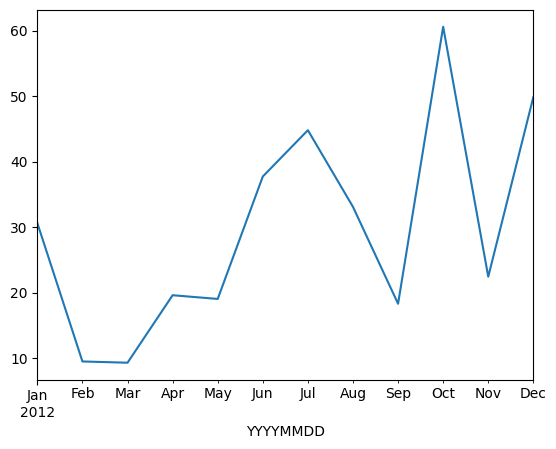

In [26]:
from pandas import read_csv
rain = read_csv('rainfall_delft_2012.dat',skiprows=23,skipinitialspace=True,parse_dates=['YYYYMMDD'], index_col=['YYYYMMDD'])
s = rain.resample('ME').mean()
print(s.head())
s.RD.plot()
print(s.iloc[0])
# s.index
#
#d = rain.resample('M',how='sum')

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [27]:
from pandas import read_csv
##rain = read_csv('rainfall_delft_all.dat',skiprows=23,skipinitialspace=True,parse_dates=['YYYYMMDD'],index_col='YYYYMMDD')
rain = read_csv('rainfall_delft_all.dat',skiprows=23,skipinitialspace=True,parse_dates=['YYYYMMDD'])

Wetted March in dataset:  1988 with total rainfall:  142.3 mm


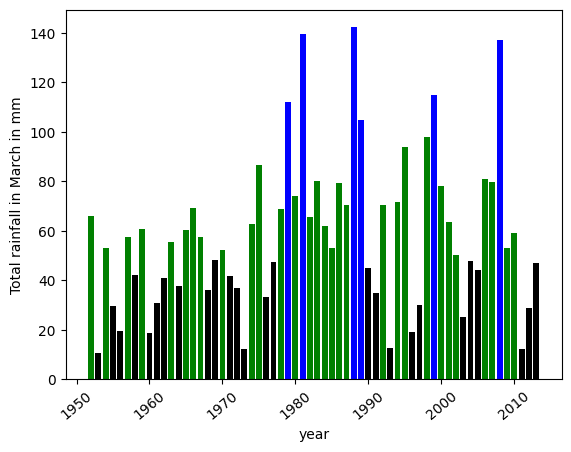

In [28]:
rain['month'] = [d.month for d in rain['YYYYMMDD']]
marchrain = rain.RD[rain.month==3]
marchrain = np.reshape(marchrain,(62,31))
marchrain = np.sum(marchrain,1)
marchrain = marchrain / 10.0 # To convert units to mm
years = np.arange(1952,1952+len(marchrain))
imax = np.argmax(marchrain)
print('Wetted March in dataset: ',years[imax],'with total rainfall: ',marchrain[imax],'mm')
plt.bar( years[ marchrain>100 ], marchrain[ marchrain>100 ], color='b')
plt.bar( years[ (marchrain<100) & (marchrain>50) ], marchrain[ (marchrain<100) & (marchrain>50) ], color='g')
plt.bar( years[ marchrain<50 ], marchrain[ marchrain<50 ], color='k')
plt.xlabel('year')
plt.ylabel('Total rainfall in March in mm')
xt = plt.xticks(rotation=40)

In [29]:
#s = rain.groupby([rain.index.year,rain.index.month]).sum()